<a href="https://colab.research.google.com/github/Nishint0001/Bitcoin_Analysis/blob/main/BITCOIN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")



In [114]:
df=pd.read_csv("bitcoin.csv")
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,21190.316406,24302954056
1,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
2,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562


In [115]:
df.shape

(366, 7)

In [116]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,22952.816486,23358.566428,22588.934090,22979.949662,22979.949662,2.514728e+10
std,4410.171553,4507.736255,4349.245577,4427.656177,4427.656177,1.311209e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.044911e+09
25%,19413.669922,19648.375000,19117.605469,19414.305176,19414.305176,1.589358e+10
50%,22739.177735,23204.110352,22396.988282,22768.867188,22768.867188,2.299074e+10
75%,27065.209961,27391.791015,26676.293945,27108.082031,27108.082031,3.119624e+10
max,31474.720703,31814.515625,30659.355469,31476.048828,31476.048828,1.189925e+11


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


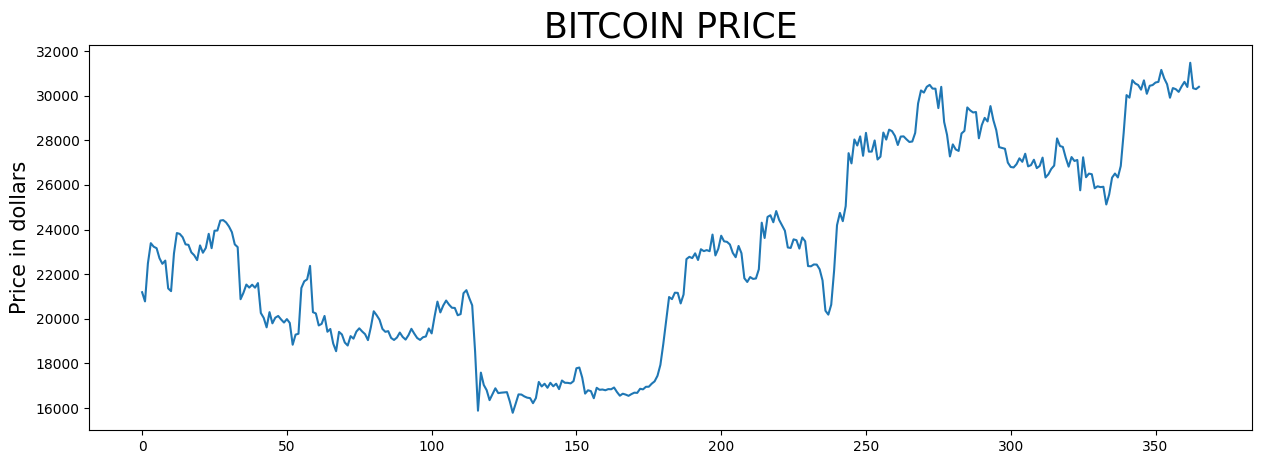

In [118]:
#PERFORMING EDA

plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.title("BITCOIN PRICE",fontsize=25)
plt.ylabel("Price in dollars",fontsize=15)
plt.show()

In [119]:
df[df['Close'] == df['Adj Close']].shape, df.shape


((366, 7), (366, 7))

In [120]:
#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [121]:
df=df.drop(["Adj Close"],axis=1)

In [122]:
df.isnull().sum()#This implies that there are no null values in the data set provided.

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   Open    366 non-null    float64
 2   High    366 non-null    float64
 3   Low     366 non-null    float64
 4   Close   366 non-null    float64
 5   Volume  366 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


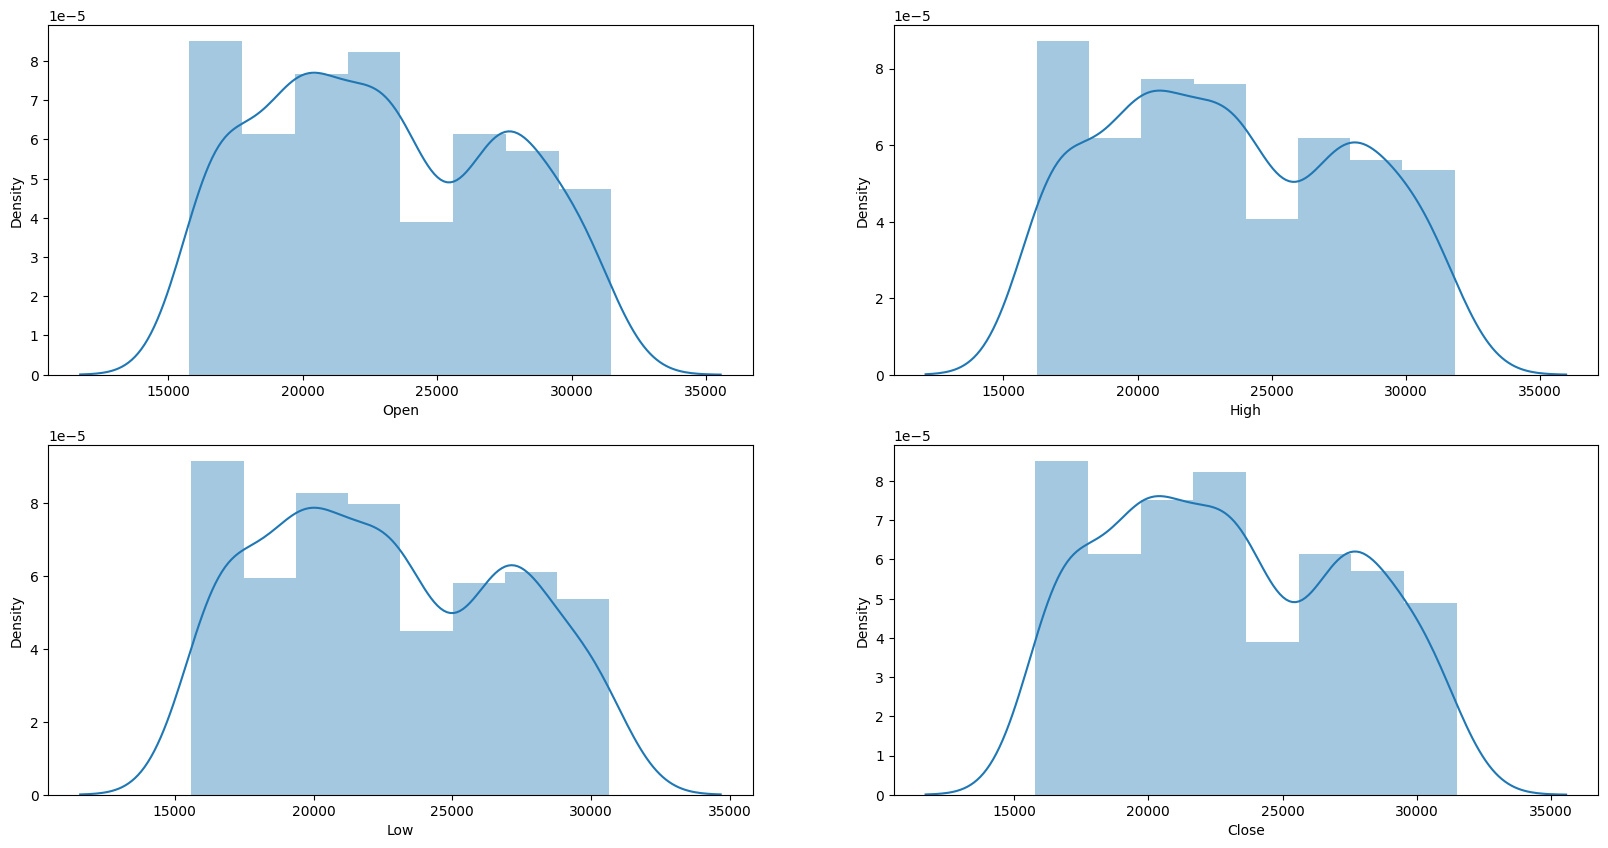

In [124]:
features=["Open","High","Low","Close"]

plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()


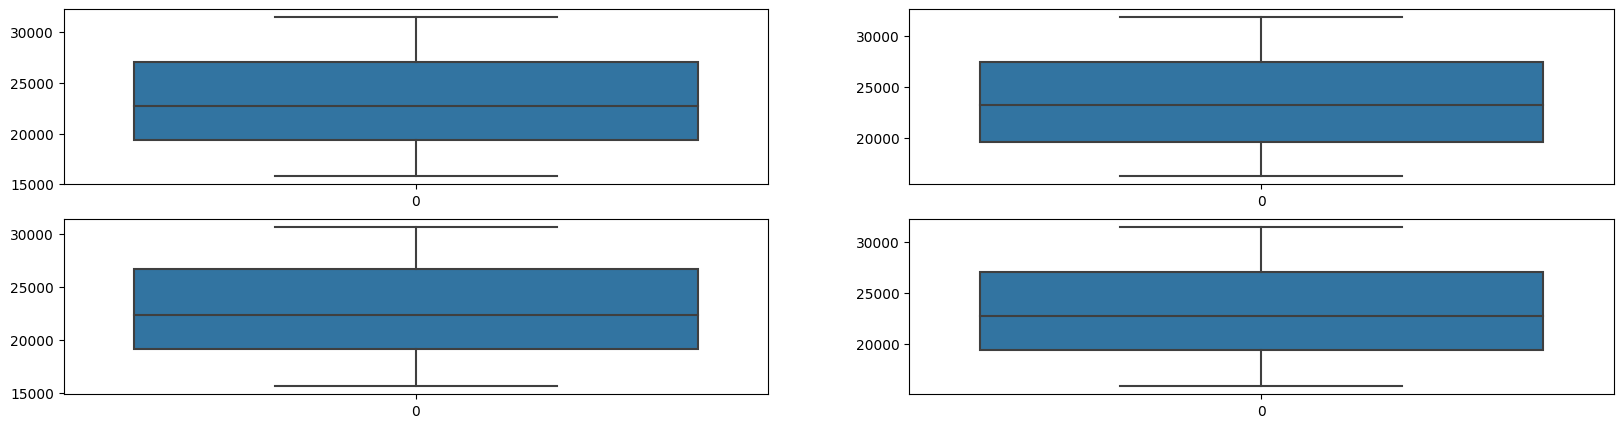

In [125]:
plt.subplots(figsize=(20,5))

for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
plt.show()

In [126]:
#Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [127]:
splitted=df["Date"].str.split("-",expand=True)
df["year"]=splitted[0].astype(int)
df["month"]=splitted[1].astype(int)
df["day"]=splitted[2].astype(int)

df.head(3)

,Date,Open,High,Low,Close,Volume,year,month,day
0,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,24302954056,2022,7,16
1,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,22927802083,2022,7,17
2,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,39974475562,2022,7,18


In [128]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,year,month,day
356,2023-07-07,29907.998047,30434.644531,29777.285156,30342.265625,13384770155,2023,7,7
357,2023-07-08,30346.921875,30374.437500,30080.160156,30292.541016,7509378699,2023,7,8
358,2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,7903327692,2023,7,9
359,2023-07-10,30172.423828,31026.083984,29985.394531,30414.470703,14828209155,2023,7,10
360,2023-07-11,30417.632813,30788.314453,30358.097656,30620.951172,12151839152,2023,7,11
361,2023-07-12,30622.246094,30959.964844,30228.835938,30391.646484,14805659717,2023,7,12
362,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,23686079548,2023,7,13
363,2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,20917902660,2023,7,14
364,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,8011667756,2023,7,15
365,2023-07-16,30304.167969,30437.560547,30122.935547,30398.568359,7824926720,2023,7,16


In [129]:
#Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

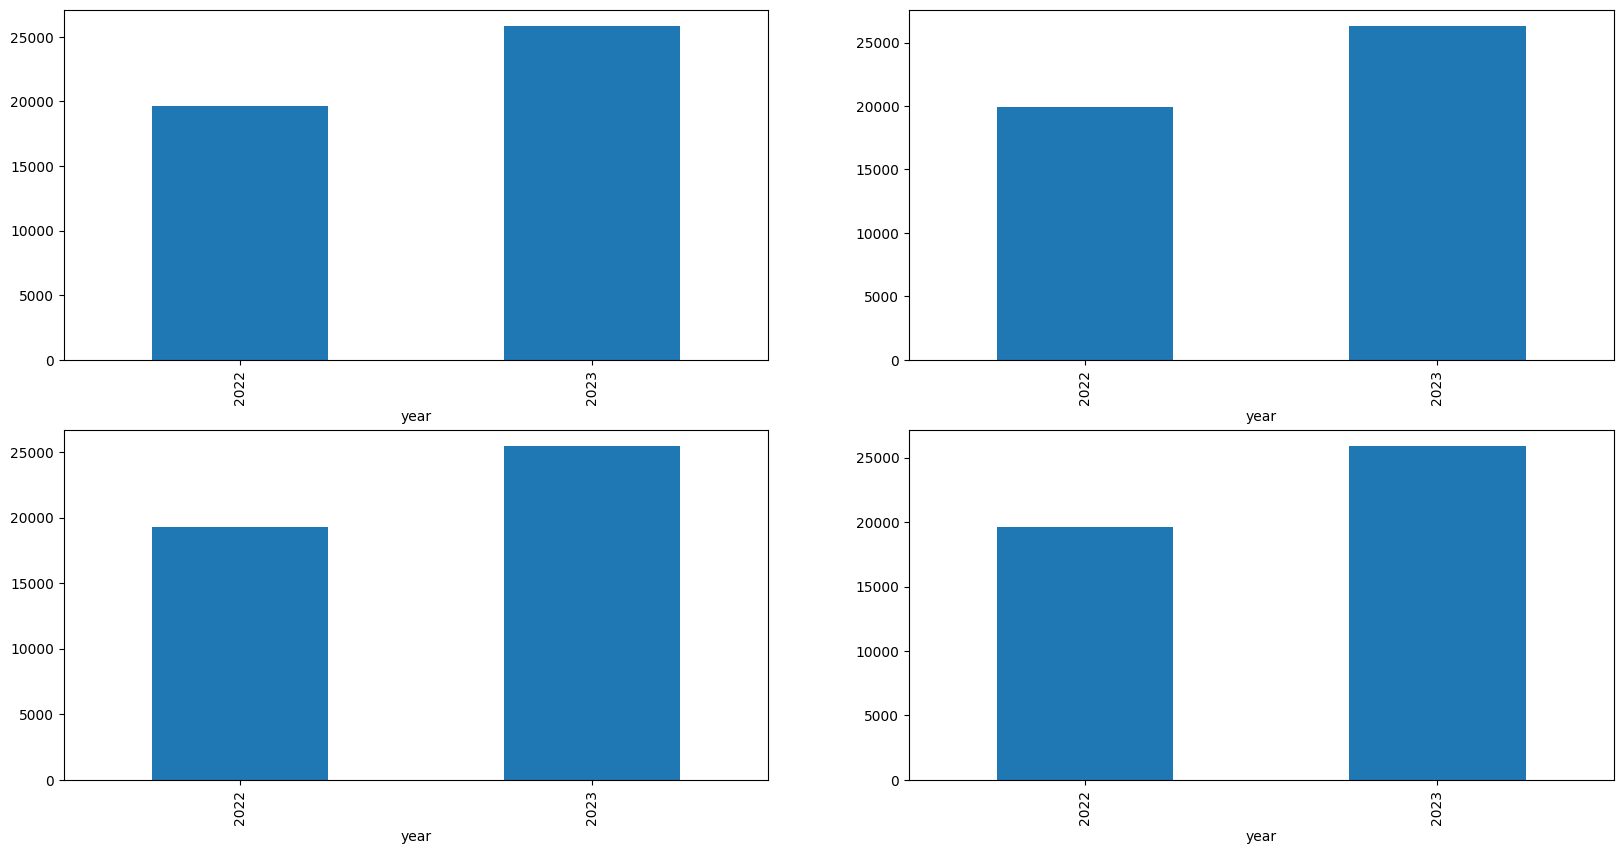

In [130]:
data_grouped=df.groupby("year").mean()

plt.figure(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [131]:
df["quater_end"]=np.where(df["month"]%3==0,1,0)
df.head(7)

,Date,Open,High,Low,Close,Volume,year,month,day,quater_end
0,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,24302954056,2022,7,16,0
1,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,22927802083,2022,7,17,0
2,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,39974475562,2022,7,18,0
3,2022-07-19,22467.849609,23666.962891,21683.406250,23389.433594,48765202697,2022,7,19,0
4,2022-07-20,23393.191406,24196.818359,23009.949219,23231.732422,42932549127,2022,7,20,0
5,2022-07-21,23233.201172,23388.322266,22431.148438,23164.628906,33631012204,2022,7,21,0
6,2022-07-22,23163.751953,23671.927734,22603.416016,22714.978516,31421555646,2022,7,22,0


In [132]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,year,month,day,quater_end
356,2023-07-07,29907.998047,30434.644531,29777.285156,30342.265625,13384770155,2023,7,7,0
357,2023-07-08,30346.921875,30374.437500,30080.160156,30292.541016,7509378699,2023,7,8,0
358,2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,7903327692,2023,7,9,0
359,2023-07-10,30172.423828,31026.083984,29985.394531,30414.470703,14828209155,2023,7,10,0
360,2023-07-11,30417.632813,30788.314453,30358.097656,30620.951172,12151839152,2023,7,11,0
361,2023-07-12,30622.246094,30959.964844,30228.835938,30391.646484,14805659717,2023,7,12,0
362,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,23686079548,2023,7,13,0
363,2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,20917902660,2023,7,14,0
364,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,8011667756,2023,7,15,0
365,2023-07-16,30304.167969,30437.560547,30122.935547,30398.568359,7824926720,2023,7,16,0


In [133]:
df["open-close"]=df["Open"]-df["Close"]
df["low-high"]=df["Low"]-df["High"]
df.head(3)

,Date,Open,High,Low,Close,Volume,year,month,day,quater_end,open-close,low-high
0,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,24302954056,2022,7,16,0,-356.212890,-995.505859
1,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,22927802083,2022,7,17,0,415.697266,-822.460937
2,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,39974475562,2022,7,18,0,-1703.777344,-1851.121094


In [134]:
df["target"]=np.where(df["Close"].shift(-1)>df["Close"],1,0)

In [135]:
#Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only.

([<matplotlib.patches.Wedge at 0x7a1faa59e710>,
 [Text(-0.10370708904581777, 1.0951003788154048, '0'),
  Text(0.1037069865151201, -1.0951003885251585, '1')],
 [Text(-0.05656750311590059, 0.5973274793538571, '53.0%'),
  Text(0.056567447190065505, -0.5973274846500863, '47.0%')])

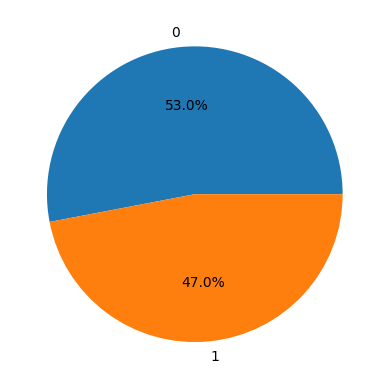

In [136]:
plt.pie(df["target"].value_counts().values,labels=[0,1],autopct="%1.1f%%")

In [137]:
#When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

<Axes: >

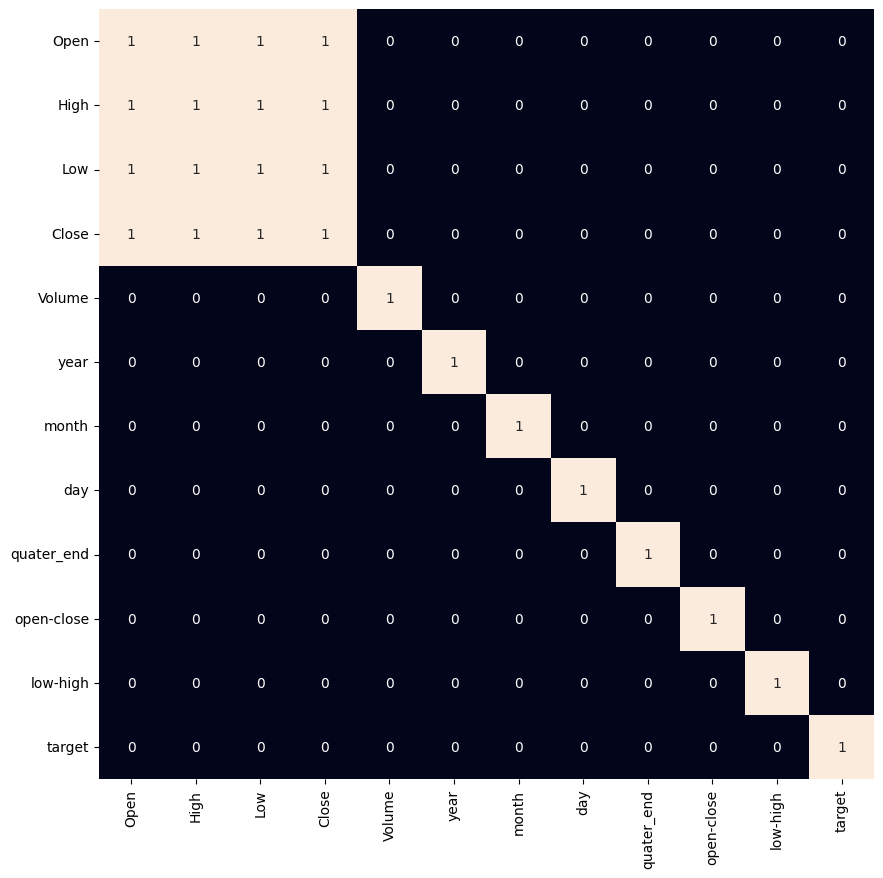

In [138]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()>0.9,annot=True,cbar=False)

In [139]:
#From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [140]:
features=df[["open-close","low-high","quater_end"]]
target=df["target"]

scaler=StandardScaler()
features=scaler.fit_transform(features)

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.1,random_state=2023)
print(x_train.shape, x_test.shape)

(329, 3) (37, 3)


In [141]:
#
#
#Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

In [155]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
   models[i].fit(x_train, y_train)

   print(f'{models[i]} : ')
   print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
   print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1]))
   print()


LogisticRegression() : 
Training Accuracy :  0.5420308102503333
Validation Accuracy :  0.5818181818181818

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.42545548807584066
Validation Accuracy :  0.5242424242424242

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

In [156]:
#Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

In [168]:
#XGBCLASSIFIER HAS HIGH ACCURACY BUT WITH OVERFITTING




In [169]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, models[0].predict(x_test))

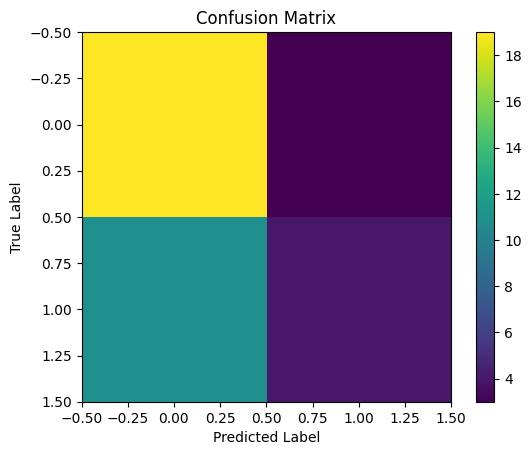

In [174]:
# Plot the confusion matrix
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.